<a href="https://colab.research.google.com/github/sujayrittikar/DeepLearning/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
cifar = tf.keras.datasets.cifar10

In [ ]:
(x_train, Y_train), (x_test, Y_test) = cifar.load_data()

In [ ]:
print("Shape of x train: ", x_train.shape)
print("Shape of Y train: ", Y_train.shape)
print("Shape of x test: ", x_test.shape)
print("Shape of Y test: ", Y_test.shape)

Shape of x train:  (50000, 32, 32, 3)
Shape of Y train:  (50000, 1)
Shape of x test:  (10000, 32, 32, 3)
Shape of Y test:  (10000, 1)


In [ ]:
# Scaling x
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
# Making y encoded
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

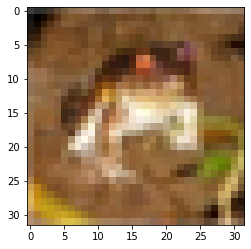

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [ ]:
# Building the CNN
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 10)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 10)        910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 10)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 10)          910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 40)               

In [ ]:
model.compile(optimizer="adam", loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])

In [ ]:
fitted = model.fit(x=x_train, y=Y_train, batch_size=10, epochs=10, validation_split=0.25)

Epoch 1/10
3750/3750 [==============================] - 41s 11ms/step - loss: 1.7953 - acc: 0.3315 - val_loss: 1.6119 - val_acc: 0.4002
Epoch 2/10
3750/3750 [==============================] - 39s 11ms/step - loss: 1.5395 - acc: 0.4361 - val_loss: 1.4942 - val_acc: 0.4537
Epoch 3/10
3750/3750 [==============================] - 40s 11ms/step - loss: 1.4639 - acc: 0.4667 - val_loss: 1.4829 - val_acc: 0.4586
Epoch 4/10
3750/3750 [==============================] - 41s 11ms/step - loss: 1.4173 - acc: 0.4867 - val_loss: 1.4486 - val_acc: 0.4767
Epoch 5/10
3750/3750 [==============================] - 41s 11ms/step - loss: 1.3798 - acc: 0.5020 - val_loss: 1.3657 - val_acc: 0.5114
Epoch 6/10
3750/3750 [==============================] - 42s 11ms/step - loss: 1.3446 - acc: 0.5129 - val_loss: 1.3597 - val_acc: 0.5098
Epoch 7/10
3750/3750 [==============================] - 41s 11ms/step - loss: 1.3137 - acc: 0.5248 - val_loss: 1.3630 - val_acc: 0.5100
Epoch 8/10
3750/3750 [==========================

In [ ]:
predictions = model.predict(x_test, batch_size=10)

In [ ]:
model.evaluate(x_test, Y_test, batch_size=10)

1000/1000 [==============================] - 4s 4ms/step - loss: 1.2977 - acc: 0.5305


[1.2977021932601929, 0.5304999947547913]

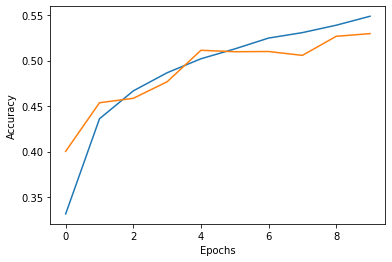

In [ ]:
plt.plot(fitted.history['acc'])
plt.plot(fitted.history['val_acc'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

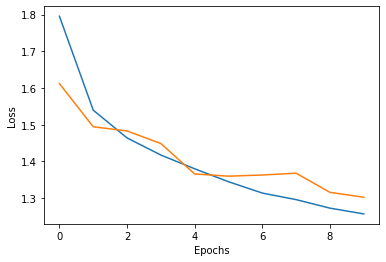

In [ ]:
plt.plot(fitted.history['loss'])
plt.plot(fitted.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()